In [72]:
import pandas as pd
import numpy as np
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU
import tensorflow as tf
from datetime import datetime
import keras

### 3) Build and train an RNN model with a GRU layer and print the train and validation loss

In [111]:
X_test_lagged = pd.read_csv('../models/X_test_lagged.csv',index_col = 0)
X_train_lagged = pd.read_csv('../models/X_train_lagged.csv',index_col = 0)
X_valid_lagged = pd.read_csv('../models/X_valid_lagged.csv',index_col = 0)

Y_test_leading = pd.read_csv('../models/Y_test_leading.csv',index_col = 0)
Y_train_leading = pd.read_csv('../models/Y_train_leading.csv',index_col = 0)
Y_valid_leading = pd.read_csv('../models/Y_valid_leading.csv',index_col = 0)

In [112]:
# reshape input to be 3D [samples, time steps, features]
X_train_lagged = X_train_lagged.values.reshape((X_train_lagged.shape[0], 28, X_train_lagged.shape[1]/28))
X_valid_lagged = X_valid_lagged.values.reshape((X_valid_lagged.shape[0], 28, X_valid_lagged.shape[1]/28))
print(X_train_lagged.shape, Y_train_leading.shape, X_valid_lagged.shape, Y_valid_leading.shape)

((2840, 28, 10), (2840, 7), (149, 28, 10), (149, 7))


In [144]:
#gru
keras.backend.clear_session()
model_gru = Sequential()
model_gru.add(GRU(50,input_shape=(X_train_lagged.shape[1], X_train_lagged.shape[2])))
model_gru.add(Dense(units=7,activation='sigmoid'))
model_gru.compile(loss='mae', optimizer='adam', metrics=['accuracy'])
model_gru.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 50)                9150      
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 357       
Total params: 9,507
Trainable params: 9,507
Non-trainable params: 0
_________________________________________________________________


In [145]:
# fit network
gru_history = model_gru.fit(X_train_lagged, Y_train_leading, epochs=10, batch_size=100, validation_data=(X_valid_lagged, Y_valid_leading), shuffle=False)

Train on 2840 samples, validate on 149 samples
Epoch 1/10
2840/2840 [==============================] - 2s 815us/step - loss: 1289.4205 - accuracy: 0.1546 - val_loss: 5839.3473 - val_accuracy: 0.0671
Epoch 2/10
2840/2840 [==============================] - 1s 302us/step - loss: 1289.3680 - accuracy: 0.1504 - val_loss: 5839.3157 - val_accuracy: 0.0671
Epoch 3/10
2840/2840 [==============================] - 1s 467us/step - loss: 1289.2825 - accuracy: 0.1567 - val_loss: 5839.2681 - val_accuracy: 0.0671
Epoch 4/10
2840/2840 [==============================] - 2s 579us/step - loss: 1289.0469 - accuracy: 0.1972 - val_loss: 5839.0654 - val_accuracy: 0.0671
Epoch 5/10
2840/2840 [==============================] - 2s 577us/step - loss: 1288.9860 - accuracy: 0.2063 - val_loss: 5838.7940 - val_accuracy: 0.0738
Epoch 6/10
2840/2840 [==============================] - 2s 581us/step - loss: 1288.9785 - accuracy: 0.2000 - val_loss: 5838.7798 - val_accuracy: 0.0872
Epoch 7/10
2840/2840 [===================

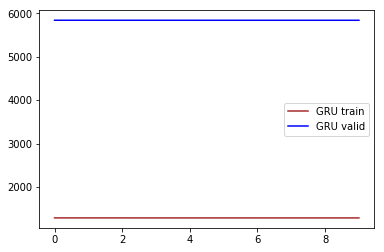

In [146]:
pyplot.plot(gru_history.history['loss'], label='GRU train', color='brown')
pyplot.plot(gru_history.history['val_loss'], label='GRU valid', color='blue')
pyplot.legend()
pyplot.show()

In [147]:
scores = model_gru.evaluate(X_valid_lagged, Y_valid_leading, verbose=0)
print("Accuracy: " + str(scores))

Accuracy: [5838.769077377831, 0.0939597338438034]


### 4) Build and train an RNN model with a GRU layer and recurrent dropout and print the train and validation loss for each epoch

In [148]:
#gru
keras.backend.clear_session()
model_gru2 = Sequential()
model_gru2.add(GRU(500,recurrent_dropout=0.5, input_shape=(X_train_lagged.shape[1], X_train_lagged.shape[2])))
model_gru2.add(Dense(units=7,activation='sigmoid'))
model_gru2.compile(loss='mae', optimizer='adam', metrics=['accuracy'])
model_gru2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 500)               766500    
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 3507      
Total params: 770,007
Trainable params: 770,007
Non-trainable params: 0
_________________________________________________________________


In [149]:
# fit network
gru_history = model_gru2.fit(X_train_lagged, Y_train_leading, epochs=10, batch_size=100, validation_data=(X_valid_lagged, Y_valid_leading), shuffle=False)

Train on 2840 samples, validate on 149 samples
Epoch 1/10
2840/2840 [==============================] - 31s 11ms/step - loss: 1289.4158 - accuracy: 0.1827 - val_loss: 5839.2270 - val_accuracy: 0.1678
Epoch 2/10
2840/2840 [==============================] - 30s 10ms/step - loss: 1289.3867 - accuracy: 0.1891 - val_loss: 5839.2434 - val_accuracy: 0.1208
Epoch 3/10
2840/2840 [==============================] - 30s 11ms/step - loss: 1289.3280 - accuracy: 0.1891 - val_loss: 5839.2442 - val_accuracy: 0.1074
Epoch 4/10
2840/2840 [==============================] - 29s 10ms/step - loss: 1289.3147 - accuracy: 0.1877 - val_loss: 5839.2433 - val_accuracy: 0.1007
Epoch 5/10
2840/2840 [==============================] - 28s 10ms/step - loss: 1289.3275 - accuracy: 0.1761 - val_loss: 5839.2244 - val_accuracy: 0.1879
Epoch 6/10
2840/2840 [==============================] - 30s 11ms/step - loss: 1289.3475 - accuracy: 0.1532 - val_loss: 5839.2232 - val_accuracy: 0.1879
Epoch 7/10
2840/2840 [===================

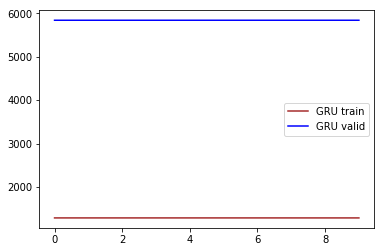

In [141]:
pyplot.plot(gru_history.history['loss'], label='GRU train', color='brown')
pyplot.plot(gru_history.history['val_loss'], label='GRU valid', color='blue')
pyplot.legend()
pyplot.show()

In [143]:
scores = model_gru2.evaluate(X_valid_lagged, Y_valid_leading, verbose=0)
print("Accuracy: " + str(scores))

Accuracy: [5839.279688483117, 0.08053690940141678]


### 6) Add an additional GRU layer to (5) above with dropout and recurrent dropout and print train and validation loss

In [ ]:
#gru
keras.backend.clear_session()
model_gru3 = Sequential()
model_gru3.add(GRU(50,recurrent_dropout=0.2, input_shape=(X_train_lagged.shape[1], X_train_lagged.shape[2])))
model_gru3.add(Dense(units=7,activation='sigmoid'))
model_gru3.compile(loss='mae', optimizer='adam', metrics=['accuracy'])
model_gru3.summary()